# EC2B1 Project Code

### Necessary imports:

In [35]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from get_regression_coefs import get_regression_coefs

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 11)
plt.rcParams['axes.titlesize'] = 16

# Part A:

In [36]:
# 2.1) Load dataset
df = pd.read_excel('pwt100.xlsx', sheet_name = 'Data')

In [37]:
# Obtaining relevant columns from the data

"""
Do we want to use data from 1950 to 2019?
Is it real GDP per capita? or can we use total real GDP?
"""

df = df.loc[:, ("countrycode", "year", "rgdpna", "pop", "emp", "rnna")]
df['rgdpna_pc'] = df['rgdpna'] / df['pop']
df['log(rgdpna_pc)'] = np.log(df["rgdpna_pc"])

In [38]:
# Obtaining data for Argentina
arg_df = df.loc[df["countrycode"] == "ARG"].copy()
arg_df = arg_df.drop('countrycode', axis = 1).reset_index(drop = True)
y_arg = arg_df['log(rgdpna_pc)']

# Obtaining data for France
fra_df = df.loc[df["countrycode"] == "FRA"].copy()
fra_df = fra_df.drop('countrycode', axis = 1).reset_index(drop = True)
y_fra = fra_df['log(rgdpna_pc)']

In [39]:
# using Exponential, Quadratic model
# Argentina

# T is the sample size
T = len(arg_df)

# First regressor x1 is T x 1 vector of ones, second regressor x2 is the vector 1, 2, ..., T
x1, x2, x3 = np.empty(T), np.empty(T), np.empty(T)

for t in range(T):
    x1[t] = 1.
    x2[t] = t + 1
    x3[t] = (t + 1)**2

a_exp_quad, b1_exp_quad, b2_exp_quad = get_regression_coefs(y_arg, x1, x2, x3)

# Initialise predicted values yhat
yhat_exp_quad_arg = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    yhat_exp_quad_arg[t] = a_exp_quad + b1_exp_quad * (t + 1) + b2_exp_quad * (t + 1)**2


Text(0, 0.5, '$log($real $Y_t$ per capita)')

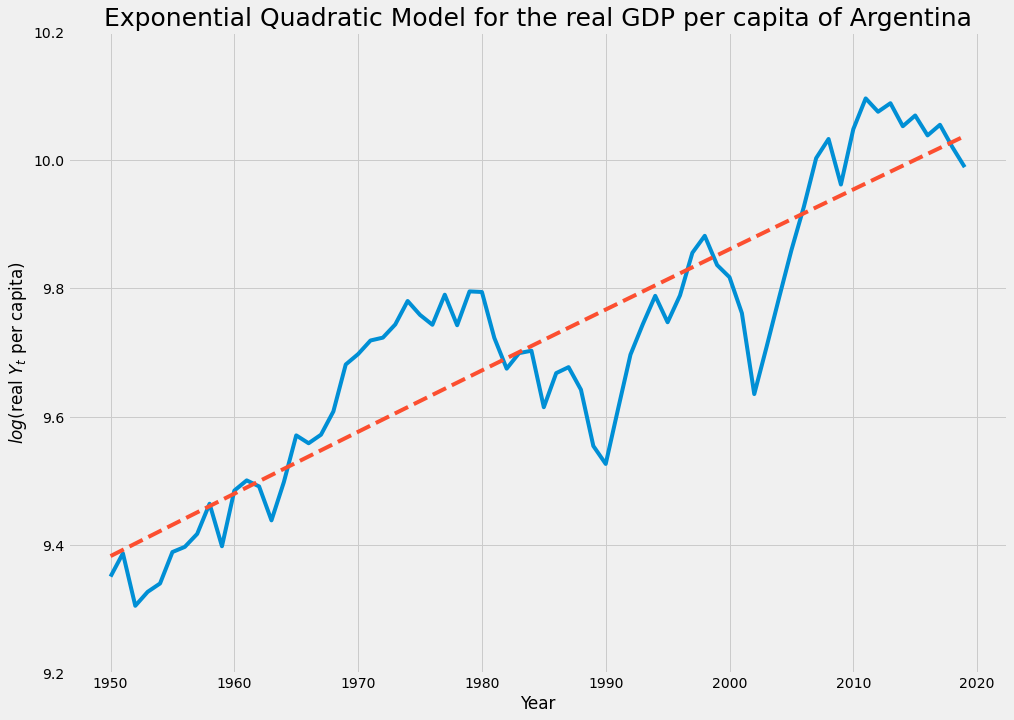

In [40]:
plt.plot(arg_df['year'], y_arg)
plt.plot(arg_df['year'], yhat_exp_quad_arg, linestyle = 'dashed', label = 'Exponential Quadratic Fit')
plt.ylim([9.2, 10.2])
plt.title('Exponential Quadratic Model for the real GDP per capita of Argentina', size = 25)
plt.xlabel('Year')
plt.ylabel(r'$log($real $Y_t$ per capita)')

In [41]:
# France
T = len(fra_df)
x1, x2, x3 = np.empty(T), np.empty(T), np.empty(T)

for t in range(T):
    x1[t] = 1.
    x2[t] = t + 1
    x3[t] = (t + 1)**2

a_exp_quad, b1_exp_quad, b2_exp_quad = get_regression_coefs(y_fra, x1, x2, x3)

# Initialise predicted values yhat
yhat_exp_quad_fra = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    yhat_exp_quad_fra[t] = a_exp_quad + b1_exp_quad * (t + 1) + b2_exp_quad * (t + 1)**2

Text(0, 0.5, '$log($real $Y_t$ per capita)')

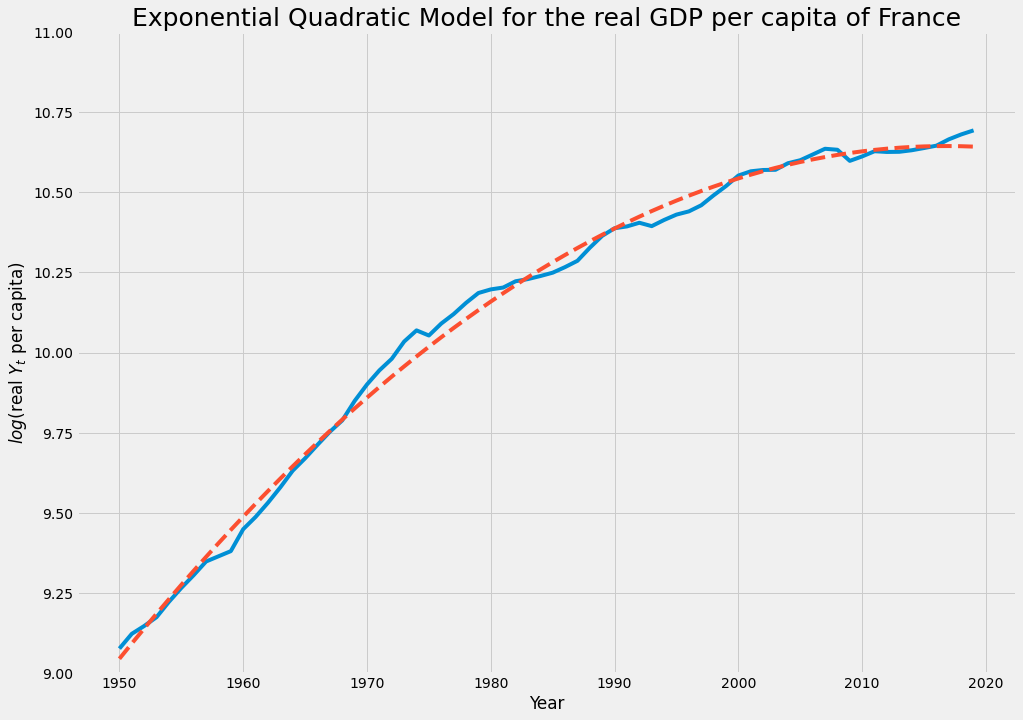

In [42]:
plt.plot(fra_df['year'], fra_df['log(rgdpna_pc)'])
plt.plot(fra_df['year'], yhat_exp_quad_fra, linestyle = 'dashed', label = 'Exponential Quadratic Fit')
plt.ylim([9.0, 11.0])
plt.title('Exponential Quadratic Model for the real GDP per capita of France', size = 25)
plt.xlabel('Year')
plt.ylabel(r'$log($real $Y_t$ per capita)')

# Part B:

Cobb Douglas function: $Y=A \times L^\alpha \times K ^{1-\alpha} $

TFP is calculated by dividing output by the weighted geometric average of labour and capital input, with the standard weighting of 0.7 for labour and 0.3 for capital.

We need to determine alpha.

In [43]:
alpha = 0.7

arg_df['TFP'] = arg_df['rgdpna'] / ((arg_df['emp'])**alpha * (arg_df['rnna']**(1 - alpha)))

plt.plot(arg_df['year'], arg_df['TFP'])
plt.title('Total Factor Productivity for Netherlands', size = 25)
plt.xlabel('Year')
plt.ylabel('Total Factor Productivity')

Text(0, 0.5, 'Total Factor Productivity')

In [44]:
alpha = 0.7

fra_df['TFP'] = fra_df['rgdpna'] / ((fra_df['emp'])**alpha * (fra_df['rnna']**(1 - alpha)))

plt.plot(fra_df['year'], fra_df['TFP'])
plt.title('Total Factor Productivity for France', size = 25)
plt.xlabel('Year')

plt.ylabel('Total Factor Productivity')

Text(0, 0.5, 'Total Factor Productivity')

# Part C:

### 1.2) Growth Accounting
Recall that as $Y=A \times L^\alpha \times K ^{1-\alpha} $, we get that $d \log(Y) = d \log(A) + \alpha d \log(L) + (1 - \alpha) d \log(K)$.


Also, recall
that $\log(1+x) \approx x$ 


such that $\log(Y_{t+1}) - \log(Y_t) = \log(Y_{t+1} / Y_{t}) = \log(1 +
(Y_{t+1}-Y_t) / Y_{t}) \approx \frac{Y_{t+1}-Y_t}{Y_t}$

That is, $d\log(Y)$ is approximately the growth rate of $Y$.

Using the above, we can compute the contribution of each factor to growth as $d \log(A) / d \log(Y)$, $\alpha d \log(L) / d\log(Y)$, and $(1 - \alpha) d \log(K) / d\log(Y)$, respectively.

In [45]:
arg_df

year        rgdpna        pop        emp          rnna     rgdpna_pc  \
0   1950  1.966885e+05  17.091824   6.608833  3.606033e+05  11507.750982   
1   1951  2.083052e+05  17.457578   6.713252  3.959399e+05  11932.079132   
2   1952  1.958982e+05  17.815967   6.819321  4.221388e+05  10995.656611   
3   1953  2.041649e+05  18.168618   6.927065  4.502244e+05  11237.226333   
4   1954  2.108126e+05  18.517168   7.036511  4.755998e+05  11384.708706   
..   ...           ...        ...        ...           ...           ...   
65  2015  1.017095e+06  43.075416  19.854450  3.193485e+06  23611.954206   
66  2016  9.959358e+05  43.508460  19.723175  3.246538e+06  22890.624318   
67  2017  1.022513e+06  43.937140  20.033661  3.316644e+06  23272.184990   
68  2018  9.971366e+05  44.361150  20.135071  3.372808e+06  22477.700082   
69  2019  9.755690e+05  44.780677  20.643215  3.399148e+06  21785.490201   

    log(rgdpna_pc)          TFP  
0         9.350776  1128.710657  
1         9.386986  1149.630501  
2         9.305256  1048.999284  
3         9.326987  1060.639599  
4         9.340026  1065.549956  
..             ...          ...  
65       10.069508  1404.693078  
66       10.038483  1375.059249  
67       10.055014  1387.481031  
68       10.020279  1341.497875  
69        9.988999  1286.775586  

[70 rows x 8 columns]

In [46]:
arg_dlog_y = np.empty(T-1)
arg_dlog_A = np.empty(T-1)
arg_dlog_k = np.empty(T-1)
arg_dlog_l = np.empty(T-1)

for t in range(T-1):
    arg_dlog_y[t] = np.log(arg_df['rgdpna'][t+1]) - np.log(arg_df['rgdpna'][t])
    arg_dlog_A[t] = np.log(arg_df['TFP'][t+1]) - np.log(arg_df['TFP'][t])
    arg_dlog_k[t] = np.log(arg_df['rnna'][t+1]) - np.log(arg_df['rnna'][t])
    arg_dlog_l[t] = np.log(arg_df['emp'][t+1]) - np.log(arg_df['emp'][t])


arg_contr_TFP = arg_dlog_A / arg_dlog_y
arg_contr_k = ((1 - alpha) * arg_dlog_k) / arg_dlog_y
arg_contr_l = (alpha * arg_dlog_l) / arg_dlog_y

In [47]:
plt.plot([1951 + i for i in range(T-1)], arg_contr_TFP)
plt.title('Contribution of TFP to Real GDP Growth for Argentina', size = 25)
plt.xlabel('Year')
plt.ylabel('Contribution of TFP to real GDP growth')

Text(0, 0.5, 'Contribution of TFP to real GDP growth')

Text(0, 0.5, 'Contribution of Capital to real GDP growth')

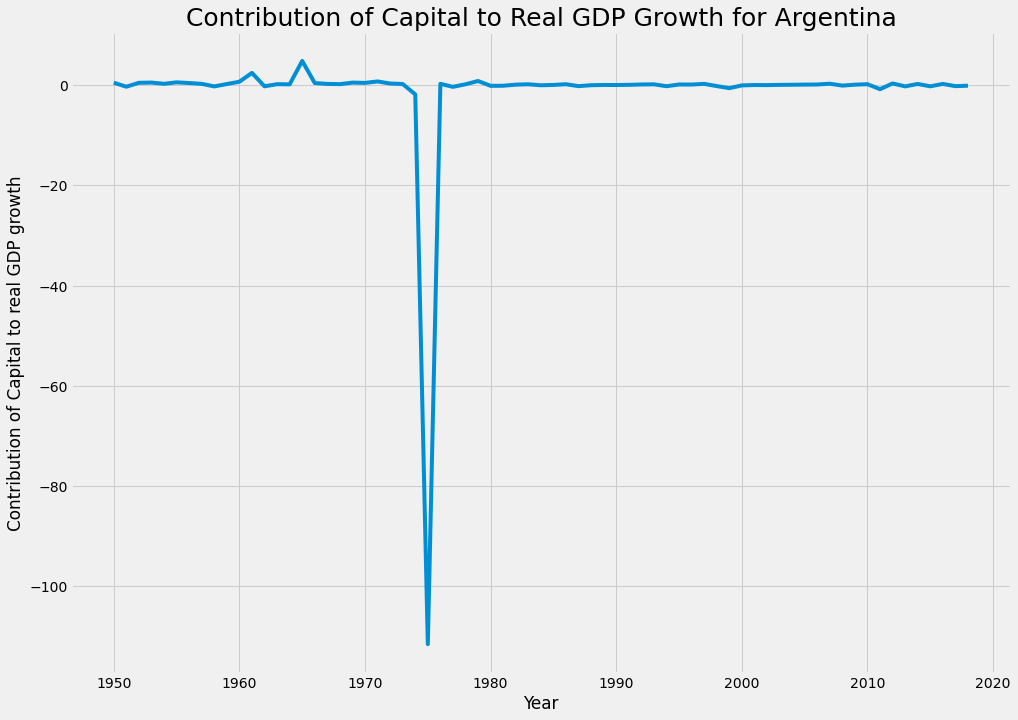

In [48]:
plt.plot([1950 + i for i in range(T-1)], arg_contr_k)
plt.title('Contribution of Capital to Real GDP Growth for Argentina', size = 25)
plt.xlabel('Year')
plt.ylabel('Contribution of Capital to real GDP growth')

Text(0, 0.5, 'Contribution of Labour to real GDP growth')

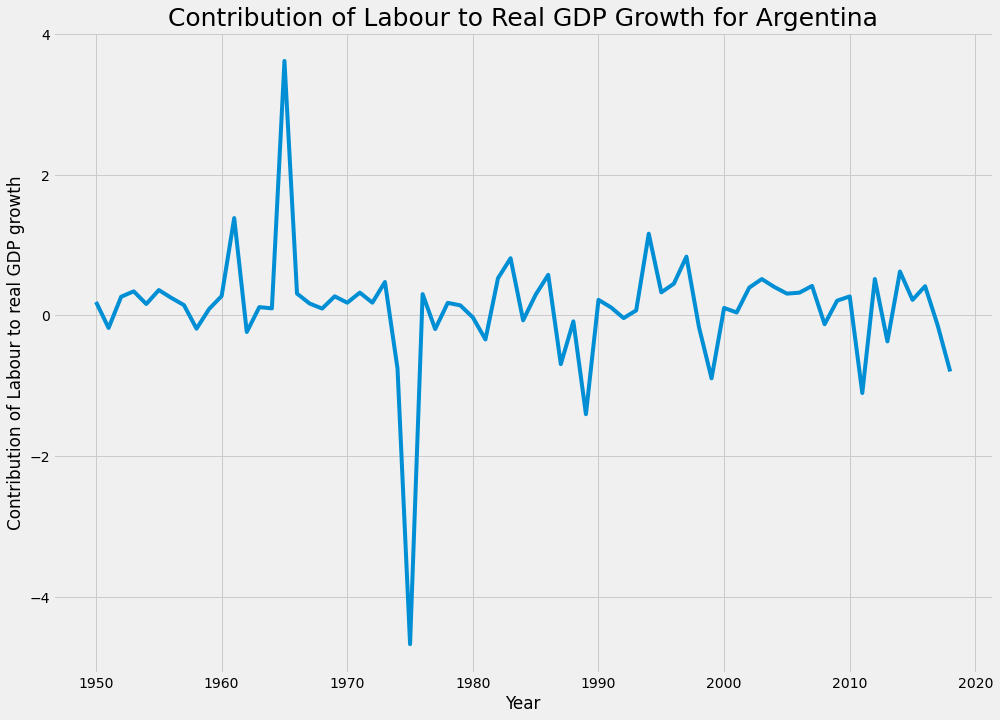

In [49]:
plt.plot([1950 + i for i in range(T-1)], arg_contr_l)
plt.title('Contribution of Labour to Real GDP Growth for Argentina', size = 25)
plt.xlabel('Year')
plt.ylabel('Contribution of Labour to real GDP growth')

In [50]:
fra_dlog_y = np.empty(T-1)
fra_dlog_A = np.empty(T-1)
fra_dlog_k = np.empty(T-1)
fra_dlog_l = np.empty(T-1)

for t in range(T-1):
    fra_dlog_y[t] = np.log(fra_df['rgdpna'][t+1]) - np.log(fra_df['rgdpna'][t])
    fra_dlog_A[t] = np.log(fra_df['TFP'][t+1]) - np.log(fra_df['TFP'][t])
    fra_dlog_k[t] = np.log(fra_df['rnna'][t+1]) - np.log(fra_df['rnna'][t])
    fra_dlog_l[t] = np.log(fra_df['emp'][t+1]) - np.log(fra_df['emp'][t])


fra_contr_TFP = fra_dlog_A / fra_dlog_y
fra_contr_k = ((1 - alpha) * fra_dlog_k) / fra_dlog_y
fra_contr_l = (alpha * fra_dlog_l) / fra_dlog_y

In [51]:
# Print table of growth contribution

print('France')
data = {'Growth Y' : fra_dlog_y, 'Growth TFP' : fra_dlog_A,
        'Growth K' : fra_dlog_k, 'Growth L' : fra_dlog_l,
        'Contribution of TFP' : fra_contr_TFP,
        'Contribution of K' : fra_contr_k,
        'Contribution of L' : fra_contr_l}
fra_growth_df = pd.DataFrame(data = data, index = [str(1950 + x) + "-" + str(1951 + x) for x in range(T-1)])
fra_growth_df.index.name = "Time Period"
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(fra_growth_df.iloc[:, 4:])

France
             Contribution of TFP  Contribution of K  Contribution of L
Time Period                                                           
1950-1951               0.780455           0.131007           0.088537
1951-1952               0.701316           0.209704           0.088980
1952-1953               0.887858           0.187674          -0.075533
1953-1954               0.819050           0.155361           0.025589
1954-1955               0.709652           0.186274           0.104074
1955-1956               0.601033           0.222962           0.176005
1956-1957               0.669961           0.230414           0.099625
1957-1958               0.578824           0.483618          -0.062442
1958-1959               0.702178           0.440581          -0.142759
1959-1960               0.797989           0.186838           0.015173
1960-1961               0.723619           0.281957          -0.005576
1961-1962               0.777632           0.231083          -0.008715

Text(0, 0.5, 'Contribution of TFP to real GDP growth')

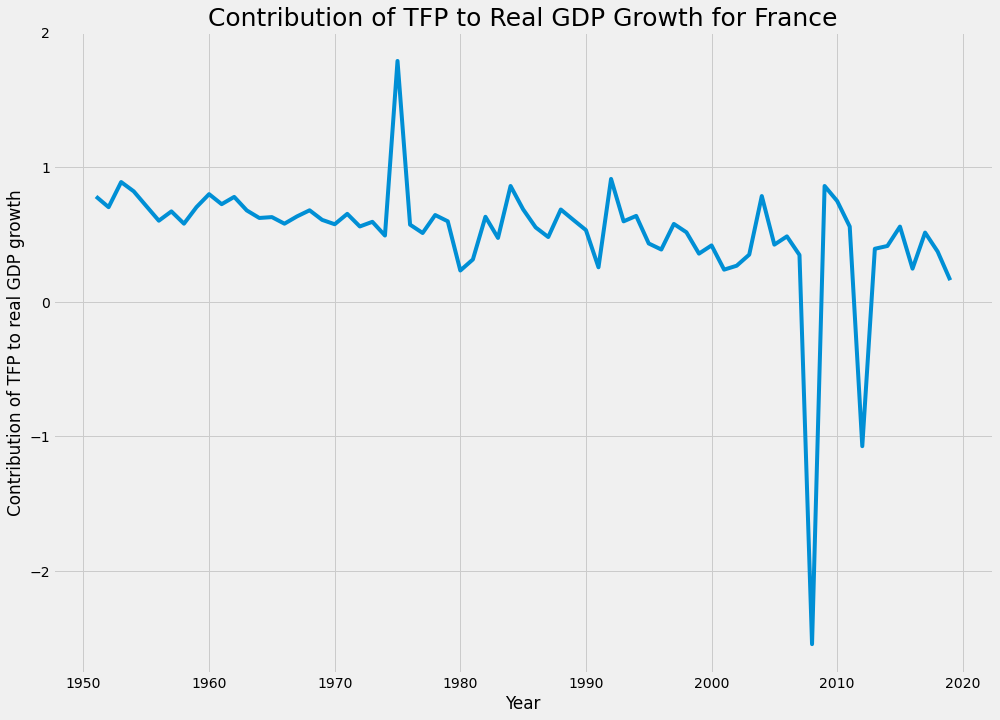

In [52]:
plt.plot([1951 + i for i in range(T-1)], fra_contr_TFP)
plt.title('Contribution of TFP to Real GDP Growth for France', size = 25)
plt.xlabel('Year')
plt.ylabel('Contribution of TFP to real GDP growth')

Text(0, 0.5, 'Contribution of Capital to real GDP growth')

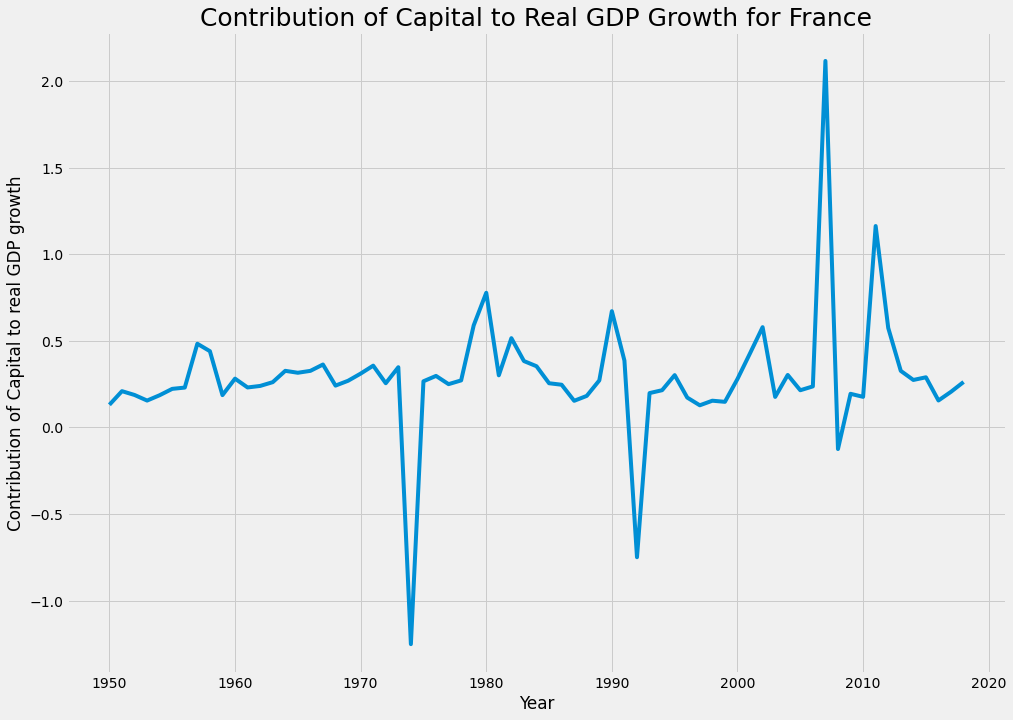

In [53]:
plt.plot([1950 + i for i in range(T-1)], fra_contr_k)
plt.title('Contribution of Capital to Real GDP Growth for France', size = 25)
plt.xlabel('Year')
plt.ylabel('Contribution of Capital to real GDP growth')

Text(0, 0.5, 'Contribution of Labour to real GDP growth')

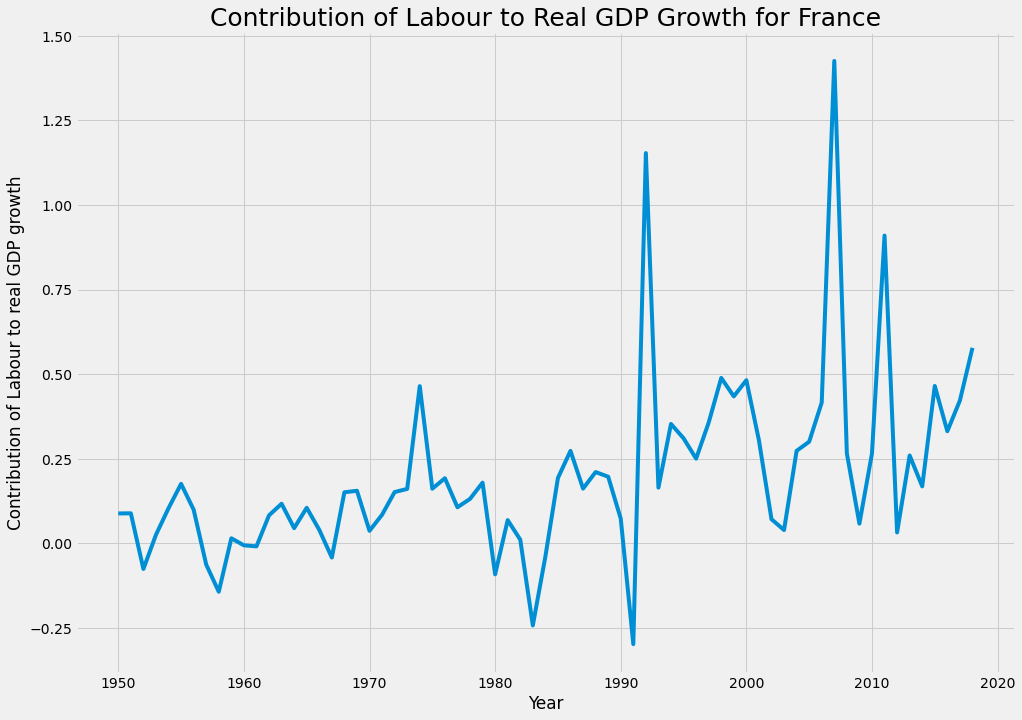

In [54]:
plt.plot([1950 + i for i in range(T-1)], fra_contr_l)
plt.title('Contribution of Labour to Real GDP Growth for France', size = 25)
plt.xlabel('Year')
plt.ylabel('Contribution of Labour to real GDP growth')

# Extras

TFP growth:

Text(0, 0.5, 'Percentage Change in TFP in %')

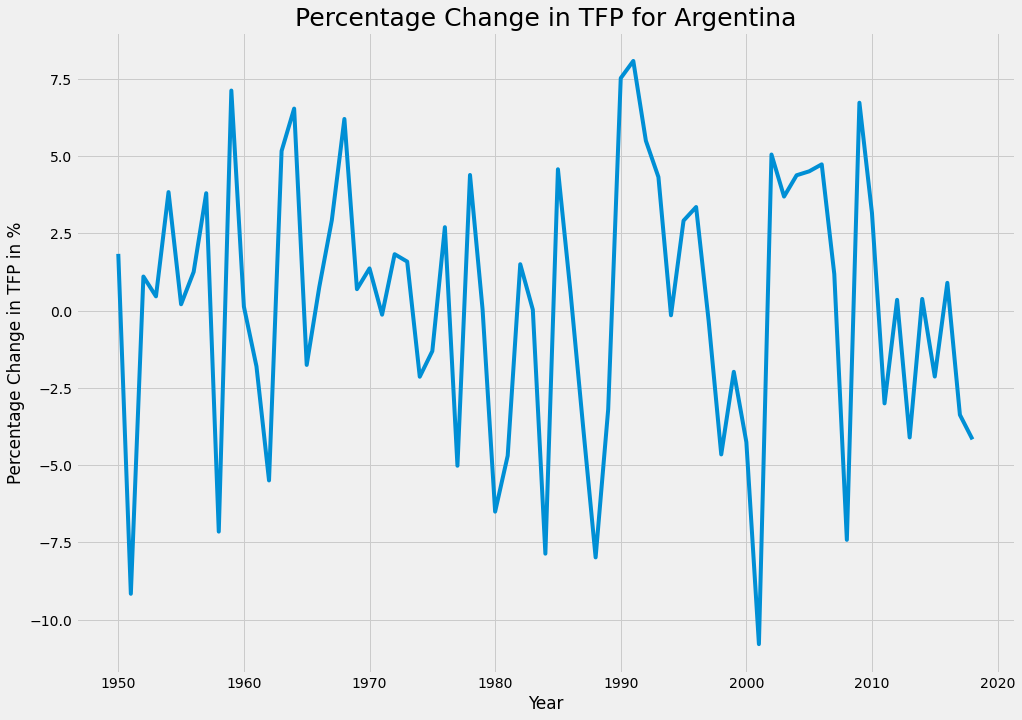

In [55]:
plt.plot([1950 + i for i in range(T-1)], arg_dlog_A*100)
plt.title('Percentage Change in TFP for Argentina', size = 25)
plt.xlabel('Year')
plt.ylabel('Percentage Change in TFP in %')

Text(0, 0.5, 'Percentage Change in TFP in %')

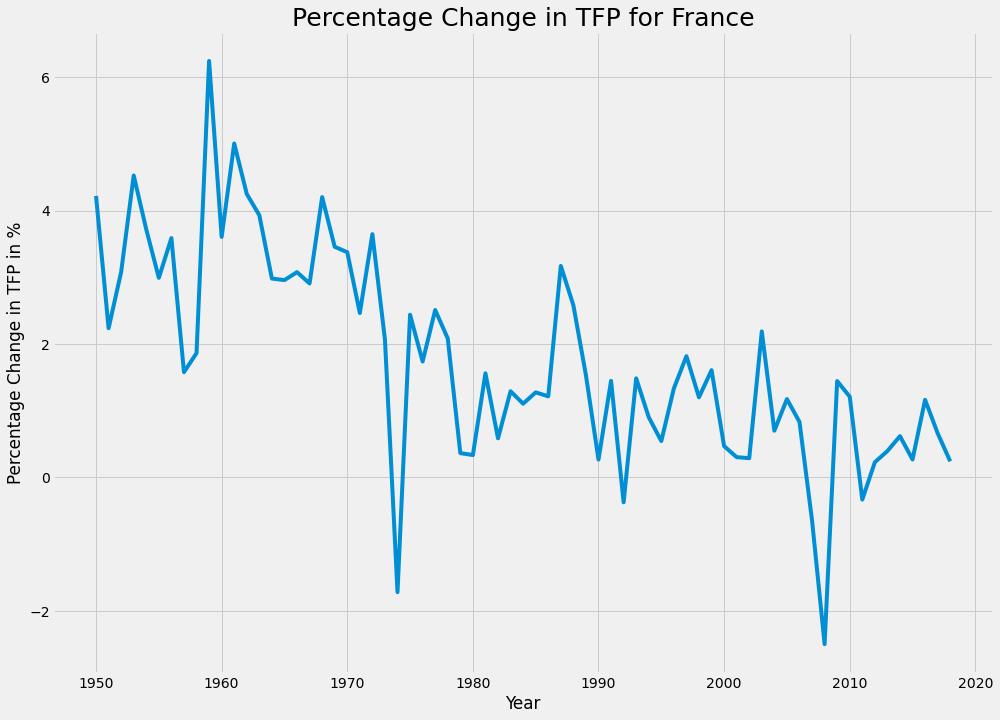

In [56]:
plt.plot([1950 + i for i in range(T-1)], fra_dlog_A*100)
plt.title('Percentage Change in TFP for France', size = 25)
plt.xlabel('Year')
plt.ylabel('Percentage Change in TFP in %')

# Unsure parts: 

Questions:
- Do we want to use data from 1950 to 2019?
- Is it real GDP per capita? or can we use total real GDP?
- Would like confirmation if Part B is correct. Am I using the right value for alpha?

